#### Group Details

* 1) Sri Maha vishnu Polisetty - 2019A4PS0321H
* 2) K Varshith - 2019A4PS0919H 
* 3) Samayam Arjit - 2020A3PS1353H
* 4) Shaury Trivedi - 2020A7PS1690H

In [3]:
import numpy as np  #importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AIP-BITS/BITS-DATA/main/cancer.csv') #reading the data

#### Exploratory Data Analysis

In [5]:
df.head() #To view first five elements

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [6]:
df.tail() #to view the last five elements

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115     0.0  
565                0.1628          0.2572                  0.06637     0.0  
566                0.1418          0.2218                  0.07820     0.0  
567                0.2650          0.4087                  0.12400     0.0  
568                0.0000          0.2871                  0.07039     1.0  

[5 rows x 31 columns]

In [7]:
df.info()  #to get general information about the data set such as null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.describe() #Used to get statistical data about the dataframe

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [9]:
df.isna().sum().sum() #zero null values in the entire dataframe

0

#### Data Visualisation

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

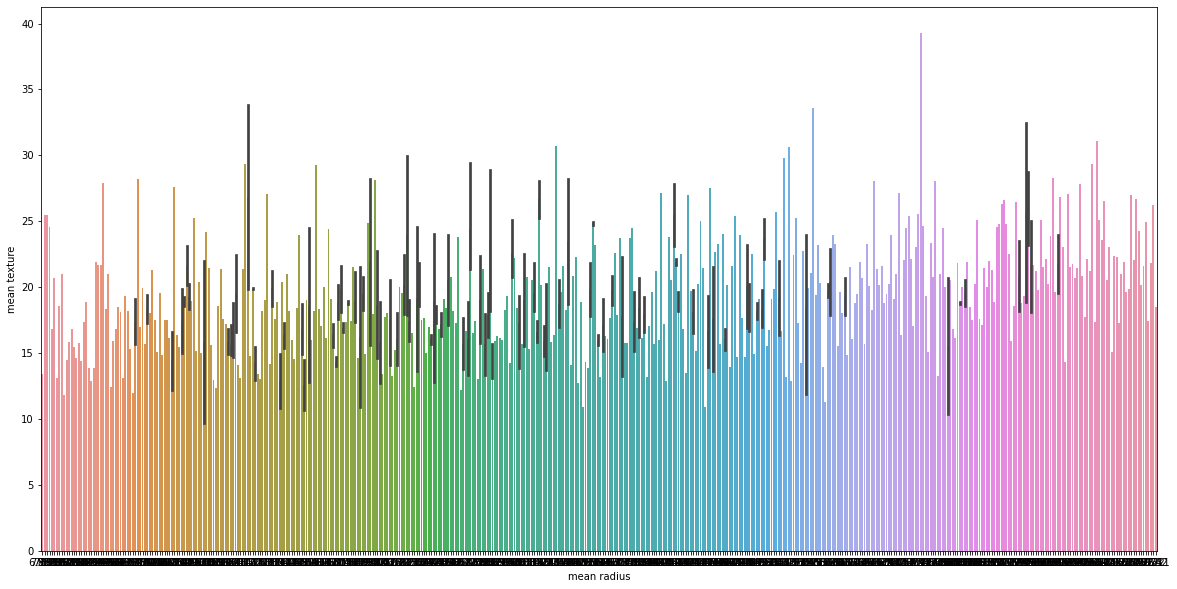

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x='mean radius',y='mean texture',data=df) #To get a visualisation between the mean radius and mean texture

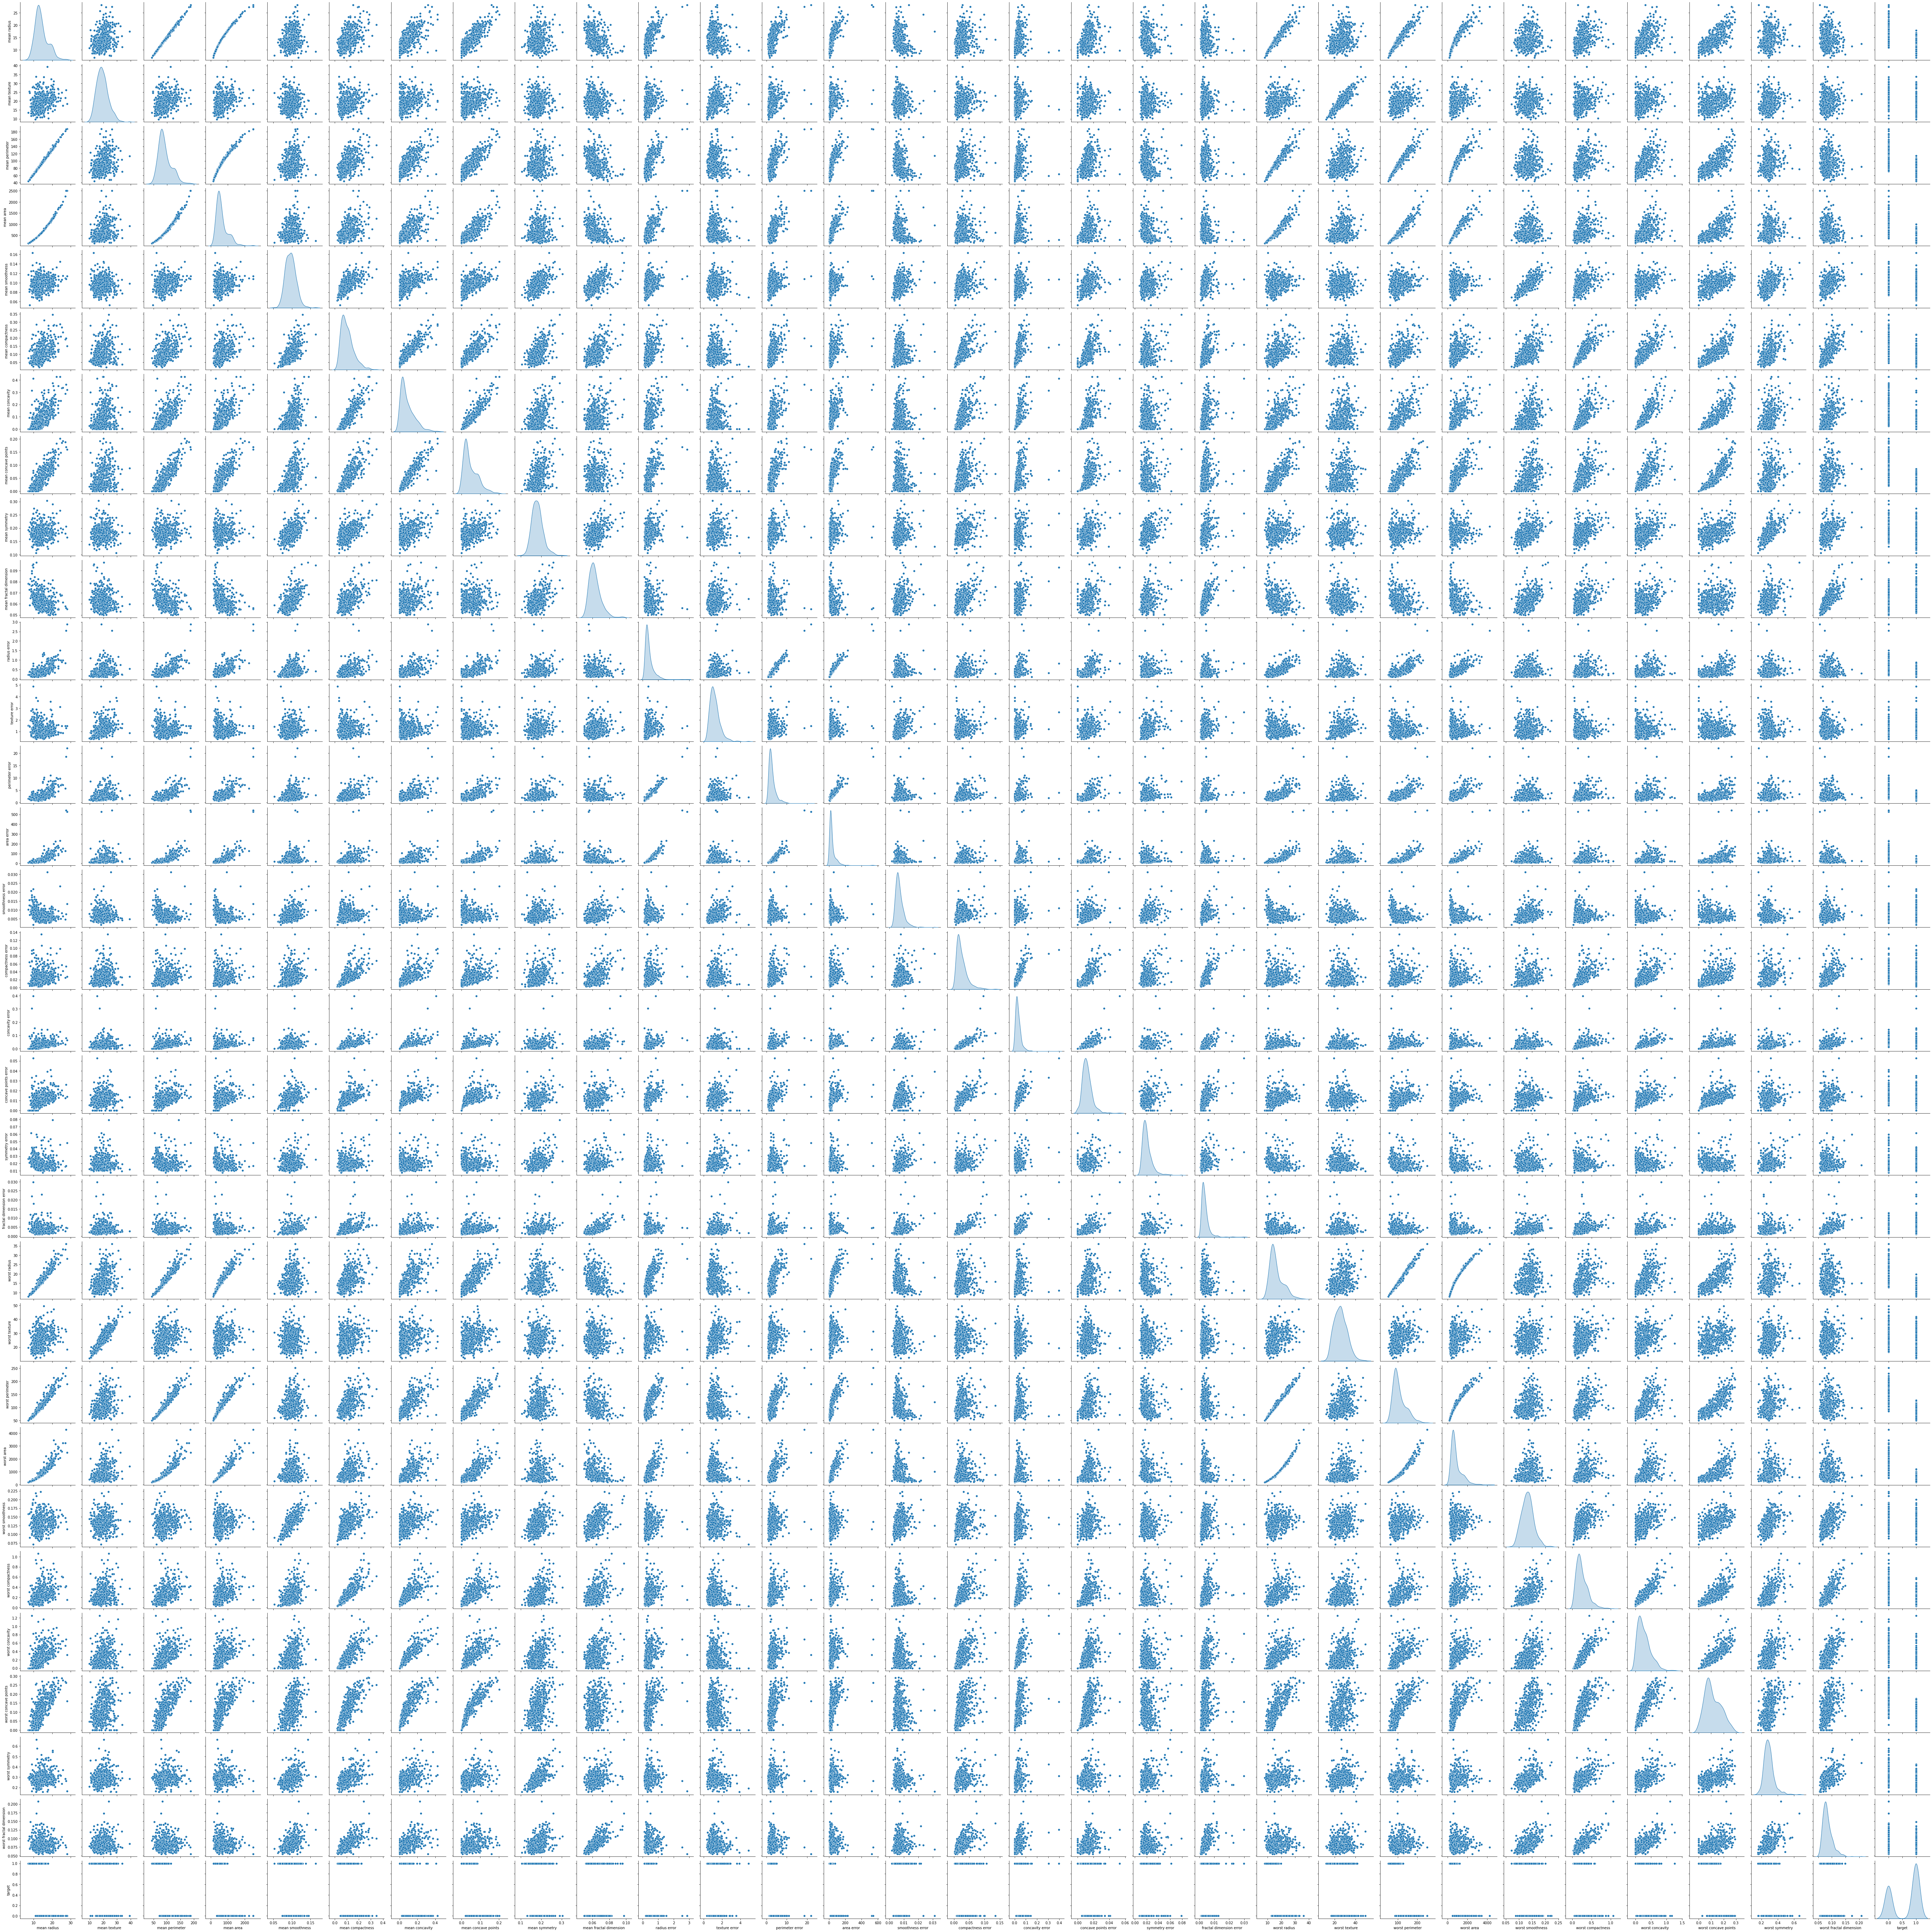

In [11]:
sns.pairplot(df, diag_kind = 'kde')  #A visualisation of corelation between each column.

<AxesSubplot:xlabel='target', ylabel='mean fractal dimension'>

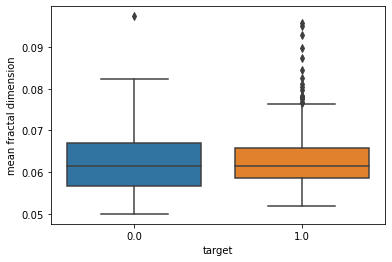

In [12]:
sns.boxplot(x='target',y='mean fractal dimension',data=df)  
#Represents a box plot between target and mean fractal dimension to understand where the percentiles stand for this column

<AxesSubplot:xlabel='target', ylabel='mean fractal dimension'>

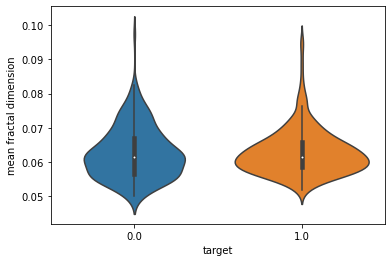

In [13]:
sns.violinplot(x='target',y='mean fractal dimension',data=df)
#A violin plot between target and mean fractal dimension

<AxesSubplot:xlabel='target', ylabel='mean fractal dimension'>

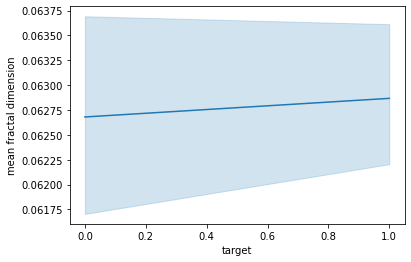

In [14]:
sns.lineplot(x='target',y='mean fractal dimension',data=df) 
#A line plot showing the linear relationship between the two features

<AxesSubplot:xlabel='target', ylabel='count'>

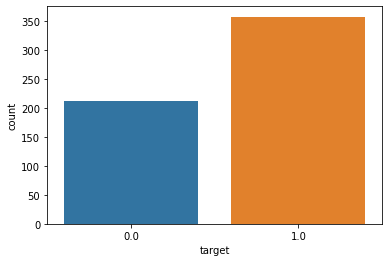

In [15]:
sns.countplot(x='target',data=df) #Gives a plot to show total number of 0s and 1s

#### Data Preprocessing

In [16]:
def replace_outlier(val, mean, std): #only keeping the data values which are within 2 standard deviations from mean
    if val > mean + 2*std:
        return median 
    elif val < mean - 2*std:
        return median 
    return val
for col in df.columns:

  med = df[col].median()
  mean = df[col].mean()
  std = df[col].std(axis=0)
  df[col] = df[col].map(lambda x: replace_outlier(x, mean, std_dev))

NameError: name 'std_dev' is not defined

In [ ]:
X = df.iloc[:, 0:30].values  
y = df.iloc[:,30].values

In [ ]:
from sklearn.model_selection import train_test_split  
#Importing train test split which can be used to divide data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, shuffle=True,random_state=101)
#Using 20 percent of data for testing and 80 percent of data for training

In [ ]:
df['target'].value_counts() #To show number of 0s and 1s in the target variable.

#### Base classifier

In [ ]:
lg=LogisticRegression() #Instantiating an object lg of class Logistic Regression

In [ ]:
lg.fit(X_train, y_train) #Training the classifier

In [ ]:
y_pred=lg.predict(X_test) #Getting predictions from the classifier

In [ ]:
print(classification_report(y_test,y_pred)) #Printing the classification report for the model

Obtained an accuracy of 89% with the base model which is logistic regression

In [ ]:
#Hyperparameter tuning for logistic regression
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty': ['l1', 'l2'], 
               'C': [0.001, 0.01, 0.1, 10, 100, 1000],
               'solver': ['liblinear', 'sag', 'saga']}]


grid_search = GridSearchCV(estimator = lg, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)

grid_search.fit(X_train, y_train) #training with best parameters
best_accuracy_log = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy_log) #printing the accuracy log
print(best_parameters)

In [ ]:
y_pred=grid_search.predict(X_test) #Obtaining predictions for our grid search model of logistic regression

In [ ]:
print(classification_report(y_test,y_pred)) 
#printing the classification report for the grid search model of logistic regression

Hence accuracy has been improved from 89 to 95 using grid search cv

#### Decision Tree Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler #importing standard scaler from scikit learn package
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size = 0.2, shuffle=True,random_state=101)

from datetime import datetime as dt
start = dt.now()
dc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
dc.fit (X_train, y_train)
running_secs = (dt.now() - start).seconds

y_pred = dc.predict (X_test)


print("Execution time = ", running_secs)

print(classification_report(y_pred,y_test))

Obtained an accuracy of 92 percent with decision tree classifier

#### Using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

start = dt.now()
dc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0, max_depth=10)
dc.fit (X_train, y_train)
running_secs = (dt.now() - start).seconds

y_pred = dc.predict(X_test)


print("Execution time = ", running_secs)

print(classification_report(y_pred,y_test))


Using PCA, the accuracy is 89%

In [ ]:
parameters = [
    {'criterion':['gini','entropy'],
     'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15], 
     'max_leaf_nodes': [2,4,6,10,15], 
     'min_samples_split': [2, 3, 4]}]

start = dt.now()
dc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0, max_depth= 20, max_leaf_nodes= 40, min_samples_split = 2)

dc.fit(X_train, y_train) #Training the decision tree classifier with parameters
running_secs = (dt.now() - start).seconds



print("Execution time = ", running_secs)




In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = dc, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)

grid_search.fit(X_train, y_train) #training our model on the best parameters
grid_search.best_params_

y_pred=grid_search.predict(X_test)

print(classification_report(y_pred,y_test))


After applying grid search cv, the accuracy went upto 95% from 92%.

#### Naive Baiyes Classifier

Complement Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, shuffle=True,random_state=101)
import time

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *

cnb = ComplementNB() 
t0=time.time()
cnb.fit(X_train, y_train)
t1 = time.time()

cross_cnb = cross_val_score(cnb, X, y)

y_pred=cnb.predict(X_test)

print(classification_report(y_test,y_pred))

t2 = time.time()
y_pred_cnb =cnb.predict(X_test)
t3 = time.time()


With Complement Naive Baiyes, obtained an accuracy of 84%

Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB() 
t0=time.time()
mnb.fit(X_train, y_train)
t1 = time.time()

cross_mnb = cross_val_score(mnb, X, y)

y_pred=mnb.predict(X_test)

print(classification_report(y_test,y_pred))

t2 = time.time()
y_pred_mnb =mnb.predict(X_test)
t3 = time.time()



With Multinomial Naive Bayes, obtained an accuracy of 84%

Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from math import *

gnb = GaussianNB()
t0 = time.time() 
gnb.fit(X_train, y_train)
t1 = time.time()
#cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
cross_gnb = cross_val_score(gnb, X, y)

print("Cross Validation score = ",cross_gnb)                

print ("Train accuracy ={:.2f}%".format(gnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(gnb.score(X_test,y_test)*100))

t2 = time.time()
y_pred_gnb =gnb.predict(X_test)
t3 = time.time()



With Gaussian Naive Bayes, obtained an accuracy of 93%

Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB() 
t0=time.time()
bnb.fit(X_train, y_train)
t1 = time.time()
#cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
cross_bnb = cross_val_score(bnb, X, y)

t2 = time.time()
y_pred_bnb =bnb.predict(X_test)
t3 = time.time()

y_pred=bnb.predict(X_test)

print(classification_report(y_test,y_pred))


With Bernoulli Naive Bayes, obtained an accuracy of 63%

After training on 4 different types of naive bayes classifiers, the best classifier obtained is Gaussian Naive Bayes algorithm
and the Bernoulli Naive Bayes performed the worst

Now, let us further tune the Gaussian Naive Bayes and see if we can get better results

In [ ]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)  #Taking variable smoothing as the parameter
}
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, verbose=1, cv=10, n_jobs=-1)
t0=time.time()

grid_search.fit(X_train, y_train) #training to find the best parameters
t1=time.time()
print(grid_search.best_estimator_)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from math import *

grid_search = GaussianNB(var_smoothing=1.519911082952933e-09) #implementing on the best parameter obtained from grid search
t0 = time.time() 
grid_search.fit(X_train, y_train)
t1 = time.time()

cross_gnb = cross_val_score(gnb, X, y)


t2 = time.time()
y_pred =grid_search.predict(X_test)
t3 = time.time()



trainingtime_list.append(t1-t0)

predictiontime_list.append(t3-t2)

print(classification_report(y_test,y_pred))

Hence, the accuracy improved from 93 to 94 using gridsearchCV

#### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=101)
svc.fit(X_train, y_train)

In [ ]:
y_pred=svc.predict(X_test)

print(confusion_matrix(y_test,y_pred)) #printing the confusion matrix

confussion = confusion_matrix(y_test, y_predict)
sns.heatmap(confussion, annot=True)
print(classification_report(y_test,y_pred))

SVC Gave an accuracy of 88% without any hyperparameter tuning. Let us further improve the accuracy using grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV
#Defining the parameter grid for svc
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000],'gamma':[100,10,1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}

grid = GridSearchCV(svc,param_grid,verbose = 4)
grid.fit(X_train,y_train)



In [ ]:
print(grid.best_estimator_)

In [ ]:
y_pred=grid.predict(X_test)

print(classification_report(y_test,y_pred))

Obtained an accuracy of 95% after performing hyperparameter tuning using gridsearchcv

After training all the models, the best model which we got is Support Vector Machines and Decision Trees with an accuracy of 95%. These models both gave the best results after hyperparameter tuning.

Comparing the precision scores for SVM and Decision Trees:
For SVM, precision score is 93 for class 0 and 96 for class 1
For Decision Trees, precision score is 95 for class 0 and 94 for class 1

Comparing the recall scores for SVM and Decision Trees:
For SVM, the recall is 93 for class 0 and 96 for class 1
For Decision Trees, the recall is 91 for class 0 and 97 for class 1

Comparing the F1 scores for SVM and Decision Trees;
For SVM, the f1 score is 93 for class 0 and 96 for class 1
For Decision Trees, the f1 score is 93 for class 0 and 96 for class 1

Since the prediction time is generally always in milliseconds, we got 0s for both. The time being very small does not affect the performance as the data is limited and not huge.